In [1]:
import numpy as np 

import xarray as xr

import matplotlib.pyplot as plt

import cartopy.crs as ccrs

/project/amp/akwilson/testdata/ENTER/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/project/amp/akwilson/testdata/ENTER/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
ds = xr.open_mfdataset("/project/amp/akwilson/testdata/CPC/tmax.*.nc")
tmax = ds['tmax'].compute()

MemoryError: 

In [ ]:
tmax_avg_by_month = tmax.groupby('time.month').mean(dim='time')

In [ ]:
month_names = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
lons, lats = np.meshgrid(ds['lon'], ds['lat'])  # this creates arrays of longitude and latitude

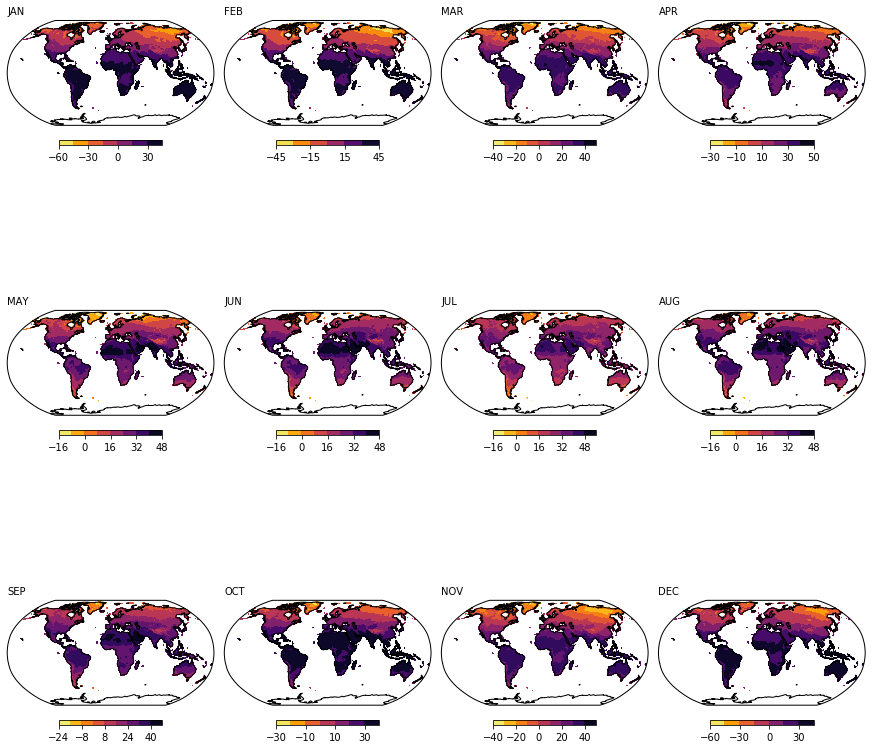

In [5]:
fig, ax = plt.subplots(figsize=(12,12), nrows=3, ncols=4, subplot_kw={"projection":ccrs.Robinson()}, constrained_layout=True)

for i, a in enumerate(ax.ravel()):
    im = a.contourf(lons, lats, tmax_avg_by_month.isel(month=i), transform=ccrs.PlateCarree(), cmap='inferno_r')
    a.coastlines()
    cbar = fig.colorbar(im, ax=a, shrink=0.5, orientation='horizontal')
    # reduce ticks:
    clr_ticks = cbar.get_ticks()
    cbar.set_ticks(clr_ticks[::2])  
    # make the map global rather than have it zoom in to
    # the extents of any plotted data
    a.set_global()
    a.set_title(month_names[i], loc='left', fontsize=10)
#fig.savefig("/project/amp/akwilson/testdata/atlantajan_figure_001.png")

['_A', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_solids', '_boundaries', '_central_N', '_config_axes', '_edges', '_extend_lower', '_extend_upper', '_extended_N', '_find_range', '_get_extension_lengths', '_get_ticker_locator_formatter', '_inside', '_label', '_labelkw', '_locate', '_manual_tick_data_values', '_mesh', '_outline', '_patch_ax', '_process_values', '_proportional_y', '_set_label', '_slice_dict', '_ticker', '_uniform_y', '_use_auto_colorbar_locator', '_values', '_y', 'add_checker', 'add_lines', 'alpha', 'autoscale', 'autoscale_None', 'ax', 'boundaries', 'callbacksSM', 'changed', 'check_update', 'cmap', 'colorbar', 'config_axis', 'dividers', 'draw_all', 'drawedges', 'extend',

Text(0.0, 1.0, 'JAN')

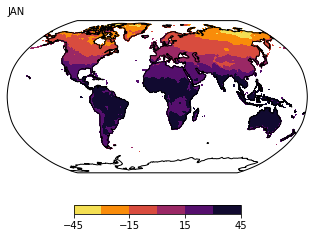

In [6]:
fig0, ax0 = plt.subplots(subplot_kw={"projection":ccrs.Robinson()})

im0 = ax0.contourf(lons, lats, tmax_avg_by_month.isel(month=1), transform=ccrs.PlateCarree(), cmap='inferno_r')
ax0.coastlines()
cbar0 = fig0.colorbar(im0, ax=ax0, shrink=0.5, orientation='horizontal')
print(dir(cbar0))
# reduce ticks:
clr_ticks = cbar0.get_ticks()
print(clr_ticks)
cbar0.set_ticks(clr_ticks[::2])  
# # make the map global rather than have it zoom in to
# # the extents of any plotted data
ax0.set_global()
ax0.set_title(month_names[0], loc='left', fontsize=10)

In [7]:
cmich = (43. + 35/60,  360. - (84. + 46/60))
atlanta = (33. + 45/60,  360. - (84. + 23/60))

In [8]:
cmich_tmax = tmax.sel(lat=cmich[0], lon=cmich[1], method='nearest')

In [9]:
time = ds['time']
augcmich = cmich_tmax[(time.dt.month == 1)]

/project/amp/akwilson/testdata/ENTER/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


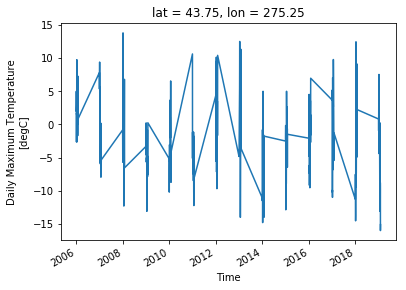

In [12]:
augcmich.plot()

In [10]:
def degC_to_degF(C):
    return C * (9./5.) + 32.

In [11]:
augcmich_f = degC_to_degF(augcmich)

In [ ]:
augcmich_f.plot()

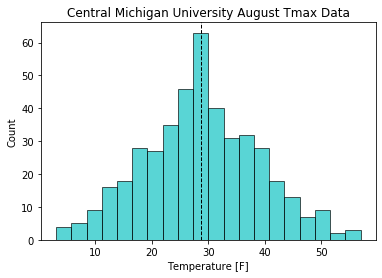

Text(1, 2, "Mean=<xarray.DataArray 'tmax' ()>\narray(28.791988, dtype=float32)\nCoordinates:\n    lat      float32 43.75\n    lon      float32 275.25")

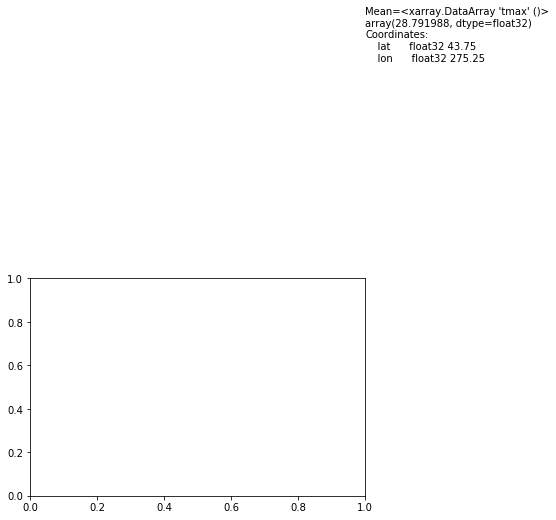

In [15]:
result = plt.hist(augcmich_f, bins=20, color='c', edgecolor='k', alpha=0.65)
plt.axvline(augcmich_f.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Central Michigan University August Tmax Data')
plt.xlabel('Temperature [F]')
plt.ylabel('Count')
plt.show()

#x= augatl_f.mean()
#_, max_ = plt.ylim()
plt.text(1, 2, f"Mean={augcmich_f.mean()}")
         
#fig.savefig("/project/amp/akwilson/testdata/atlantajan_figure_001.png")


In [12]:
augcmich_f

<xarray.DataArray 'tmax' (time: 434)>
array([35.66432 , 36.6916  , 37.298275, ..., 14.447765,  3.14452 ,  4.752161],
      dtype=float32)
Coordinates:
    lat      float32 43.75
    lon      float32 275.25
  * time     (time) datetime64[ns] 2006-01-01 2006-01-02 ... 2019-01-31

In [4]:
import pandas
import numpy as np
import datetime as dt

In [5]:
from itertools import groupby


In [6]:
import xarray as xr
import numpy as np
# function that does the counting logic
def incrementer(current_value, previous_value, last_id):
    # function that does the counting logic
    if current_value == 1:
        if previous_value > 0:
            return last_id  # continue current event
        else:
            return last_id + 1  # start a new event
    else:
        return 0  # non-event

In [7]:
vincrementer = np.vectorize(incrementer)
# the testing data set:
# "by_coords" for newest version of xarray
# the quantiles:
ds_q = xr.open_dataset("/project/amp/brianpm/TemperatureExtremes/Derived/CPC_tmax_dayofyear_quantiles_15daywindow_c20190622.nc")

In [8]:
tmax = ds["tmax"]
ninety = ds_q["tmax"].sel(quantile=0.9)
# make 'dayofyear' be the coordinate variable for ninety
ninety = ninety.rename({"time": "dayofyear"})
ninety["dayofyear"] = np.arange(1, 367)


In [9]:
extreme_mask = np.where(tmax.groupby("time.dayofyear") >= ninety, 1, 0)
# get it into form of DataArray with coordinates
xmask = xr.DataArray(extreme_mask, coords=tmax.coords, dims=tmax.dims)

/project/amp/akwilson/testdata/ENTER/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


In [19]:
extreme_mask

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
xcount = np.zeros((360, 720))


In [11]:
event_id = np.zeros(tmax.shape)
event_id[0, ...] = extreme_mask[0, ...]

In [12]:
for t in np.arange(1, len(tmax["time"])):
    event_id[t, ...] = vincrementer(xmask[t, ...], xmask[t - 1, ...], xcount)
    # increment xcount:
    # rule: if the current event_id is larger than the last time, it means we started a new event,
    #       so increment xcount, otherwise keep the current value.
    xcount = np.where(event_id[t, ...] > event_id[t - 1, ...], xcount + 1, xcount)


In [13]:
event_id_da = xr.DataArray(event_id, coords=tmax.coords, dims=tmax.dims)
event_id_da.name = "Event_ID"
event_id_da.attrs["long_name"] = "Event ID Number based on Tmax > 90th percentile"


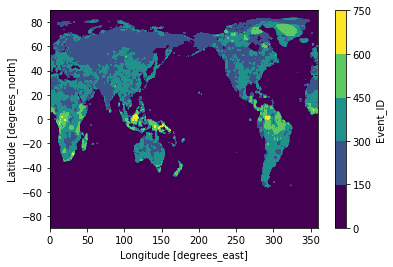

In [14]:
event_id_da.max(dim='time').plot.contourf()

In [14]:

[np.asscalar(i.values) for i in event_id_da.sel(lat=43.75, lon=275.25, method='nearest')]



[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 3.0,
 3.0,
 0.0,
 0.0,
 4.0,
 0.0,
 5.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 7.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 8.0,
 8.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 9.0,
 0.0,
 10.0,
 10.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 11.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 12.0,
 12.0,
 12.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [15]:
 from itertools import groupby

In [16]:
# eventnum = set(event_id_da.values)
eventnum = event_id_da.max(dim="time")
print(eventnum)


<xarray.DataArray 'Event_ID' (lat: 360, lon: 720)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75


In [15]:
data = event_id_da.sel(lat=43.75, lon=275.25, method='nearest').values
mynums = set(data)
duration = []
for i in mynums:
    tmp = data[data == i]
    duration.append(len(tmp))
    

In [18]:
np.sum(np.array(duration) == 4)

7

In [19]:
np.unique(event_id_da, return_index=False, return_inverse=False, return_counts=True, axis=None)

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
        143., 144., 145., 146., 147., 

In [21]:
unique_event,unique_counts = np.unique(event_id_da, return_index=False, return_inverse=False, return_counts=True, axis=None)

In [22]:
unique_counts[unique_event == 20]

array([145441])

In [33]:
import numpy as np
import xarray as xr
logging.basicConfig(level=logging.INFO)

testing = False
test_sample_size = 5*366

In [34]:
def theloop(arr):
	# setup 
	out_event_size = arr.max()            # largest number of events -> defines output array size
	nz = arr.shape[1]                     # number of spatial points
	a = np.zeros((nz, out_event_size+1))  # +1 because we didn't include the zeros
	b = np.zeros((nz, out_event_size+1))
	c = np.zeros((nz, out_event_size+1))
	for loc in np.arange(nz):
		if loc % 1000 == 0:
			logging.info(f"We are up to location index {loc}")
		loc_ids, init_ndx, duration = np.unique(
	    	arr[:,loc], return_index=True, return_counts=True)
		n_loc = len(loc_ids)
		a[loc, 0:n_loc] = loc_ids
		b[loc, 0:n_loc] = init_ndx
		c[loc, 0:n_loc] = duration
		# a: the individual id numbers for events at each point
		# b: the index of the first occurrence of each event (initial time)
		# c: the number of values with the id value, i.e., the duration in days
	return a,b,c

In [35]:
fil = (
    "/project/amp/brianpm/TemperatureExtremes/Derived/CPC_tmax_90pct_event_detection.nc"
)
ds = xr.open_dataset(fil)
logging.info("ds is defined.")
if testing:
	events = ds["Event_ID"].isel(time=slice(0,test_sample_size))
else:
	events = ds["Event_ID"]

logging.info("events array defined.")

INFO:root:ds is defined.
INFO:root:events array defined.


In [36]:
events_stacked = events.stack(z=("lat", "lon"))
logging.info("Stacked events.")

INFO:root:Stacked events.


In [37]:
zint = events_stacked.values.astype(int)
logging.info(f"Convert events to integers. Result is shape {zint.shape}.")  # should still be [time, z]

mx = np.max(zint)
logging.info(f"Max number of events is {mx}; output dimesion size (add one for zeros).")


INFO:root:Convert events to integers. Result is shape (14736, 259200).
INFO:root:Max number of events is 1201; output dimesion size (add one for zeros).


In [38]:
ids, ndx, dur = theloop(zint)
logging.info("Loop done.")

INFO:root:We are up to location index 0
INFO:root:We are up to location index 1000
INFO:root:We are up to location index 2000
INFO:root:We are up to location index 3000
INFO:root:We are up to location index 4000
INFO:root:We are up to location index 5000
INFO:root:We are up to location index 6000
INFO:root:We are up to location index 7000
INFO:root:We are up to location index 8000
INFO:root:We are up to location index 9000
INFO:root:We are up to location index 10000
INFO:root:We are up to location index 11000
INFO:root:We are up to location index 12000
INFO:root:We are up to location index 13000
INFO:root:We are up to location index 14000
INFO:root:We are up to location index 15000
INFO:root:We are up to location index 16000
INFO:root:We are up to location index 17000
INFO:root:We are up to location index 18000
INFO:root:We are up to location index 19000
INFO:root:We are up to location index 20000
INFO:root:We are up to location index 21000
INFO:root:We are up to location index 22000
I

In [66]:
ids_da = xr.DataArray(ids, coords={"z":events_stacked['z'], 'events':np.arange(1,mx+2)}, 
	dims=("z", "events"))
ndx_da = xr.DataArray(ndx, coords={"z":events_stacked['z'], 'events':np.arange(1,mx+2)}, 
	dims=("z", "events"))
cnt_da = xr.DataArray(dur, coords={"z":events_stacked['z'], 'events':np.arange(1,mx+2)}, 
	dims=("z", "events"))

In [60]:
ids_da.name = "Event_ID"
ndx_da.name = "initial_index"
cnt_da1.name = "duration"

logging.info("DataArray are made")
ids_da = ids_da.unstack()
ndx_da = ndx_da.unstack()
cnt_da = cnt_da.unstack()
logging.info("Unstacked.")

INFO:root:DataArray are made
INFO:root:Unstacked.


In [43]:
print(cnt_da)

<xarray.DataArray 'duration' (events: 1202, lat: 360, lon: 720)>
array([[[14736., 14736., ..., 14736., 14736.],
        [14736., 14736., ..., 14736., 14736.],
        ...,
        [14736., 14736., ..., 14736., 14736.],
        [14736., 14736., ..., 14736., 14736.]],

       [[    0.,     0., ...,     0.,     0.],
        [    0.,     0., ...,     0.,     0.],
        ...,
        [    0.,     0., ...,     0.,     0.],
        [    0.,     0., ...,     0.,     0.]],

       ...,

       [[    0.,     0., ...,     0.,     0.],
        [    0.,     0., ...,     0.,     0.],
        ...,
        [    0.,     0., ...,     0.,     0.],
        [    0.,     0., ...,     0.,     0.]],

       [[    0.,     0., ...,     0.,     0.],
        [    0.,     0., ...,     0.,     0.],
        ...,
        [    0.,     0., ...,     0.,     0.],
        [    0.,     0., ...,     0.,     0.]]])
Coordinates:
  * events   (events) int64 1 2 3 4 5 6 7 ... 1196 1197 1198 1199 1200 1201 1202
  * lat      (la

In [65]:
if not testing:
	output = xr.merge([ids_da, ndx_da, cnt_da])
	output.to_netcdf("/project/amp/akwilson/testdata/CPC_tmax_90pct_event_attributes.nc1", format="NETCDF4")
logging.info("DONE.")

PermissionError: [Errno 13] Permission denied: b'/project/amp/akwilson/testdata/CPC_tmax_90pct_event_attributes.nc1'

In [23]:
from pathlib import Path

In [24]:
import xarray as xr
import numpy as np

In [25]:
data_location = Path("/project/amp/akwilson/testdata")
data_file = data_location / 'CPC_tmax_90pct_event_attributes.nc'

In [27]:
ds = xr.open_dataset(data_file)


OSError: [Errno -51] NetCDF: Unknown file format: b'/project/amp/akwilson/testdata/CPC_tmax_90pct_event_attributes.nc'

In [62]:
B1 = ds.sel(lat=33, lon=360-84, method='nearest')

In [63]:
B1['Event_ID'].max() # number of events at this point

duration = B1['duration'].where(B1['Event_ID'] != 0)

KeyError: 'duration'

In [71]:
h = np.histogram(duration[duration!=np.nan], bins=np.linspace(0.5, 21.5, 22))

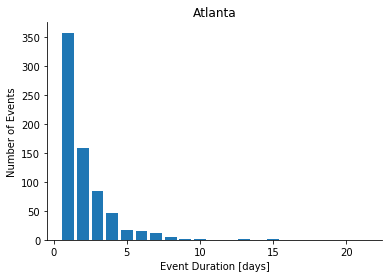

In [72]:
fig, ax = plt.subplots()
ax.bar( np.linspace(1, 21, 21), h[0])
ax.set_title("Atlanta")
ax.set_ylabel("Number of Events")
ax.set_xlabel("Event Duration [days]")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [73]:
tmax_dataset = xr.open_mfdataset('/project/amp/jcaron/CPC_Tminmax/tmax.*.nc')

In [74]:
tmax = tmax_dataset['tmax'].sel(lat=33, lon=360-84, method='nearest')
print(f"The shape of this Tmax subset is {tmax.shape}. The minimum and maximum values in the subset are {tmax.max().values} and {tmax.min().values}.")

The shape of this Tmax subset is (14736,). The minimum and maximum values in the subset are 41.56576919555664 and -5.485490322113037.


In [75]:
# construct a dictionary with all the events:
# key will be event ID values will be the tmax data for the event
events = zip(B['initial_index'][B['Event_ID'] != 0].values.astype(int), B['duration'][B['Event_ID'] != 0].values.astype(int))
event_data = dict()
# construct another dictionary at the same time to get the magnitude
magnitude = dict()
for i, event in enumerate(events):
    event_data[i] = tmax.isel(time=slice(event[0], event[0]+event[1])).values
    if event[1] > 1:
        magnitude[i] = event_data[i].max() - event_data[i].min()
        print(f"Multiday event at number {i} starts at time {event[0]}  which is {tmax['time'][event[0]].values} with duration {event[1]} days and magnitude {magnitude[i]}.")


Multiday event at number 0 starts at time 78  which is 1979-03-20T00:00:00.000000000 with duration 2 days and magnitude 0.14775657653808594.
Multiday event at number 7 starts at time 556  which is 1980-07-10T00:00:00.000000000 with duration 4 days and magnitude 2.574920654296875.
Multiday event at number 8 starts at time 562  which is 1980-07-16T00:00:00.000000000 with duration 2 days and magnitude 0.22882080078125.
Multiday event at number 9 starts at time 582  which is 1980-08-05T00:00:00.000000000 with duration 5 days and magnitude 1.2371025085449219.
Multiday event at number 10 starts at time 597  which is 1980-08-20T00:00:00.000000000 with duration 3 days and magnitude 1.8834190368652344.
Multiday event at number 12 starts at time 613  which is 1980-09-05T00:00:00.000000000 with duration 5 days and magnitude 1.7511138916015625.
Multiday event at number 13 starts at time 622  which is 1980-09-14T00:00:00.000000000 with duration 3 days and magnitude 2.865673065185547.
Multiday event

In [88]:
events = zip(B['initial_index'][B['Event_ID'] != 0].values.astype(int), B['duration'][B['Event_ID'] != 0].values.astype(int))
event_data = dict()
# construct another dictionary at the same time to get the magnitude
magnitude = dict()
for i, event in enumerate(events):
    event_data[i] = tmax.isel(time=slice(event[0], event[0]+event[1])).values
    if event[1] > 1:
        magnitude[i] = event_data[i].max() - event_data[i].min()
        print(f"Multiday event at number {i} starts at time {event[0]}  which is {tmax['time'][event[0]].values} with duration {event[1]} days and magnitude {magnitude[i]}.")


Multiday event at number 0 starts at time 78  which is 1979-03-20T00:00:00.000000000 with duration 2 days and magnitude 0.14775657653808594.
Multiday event at number 7 starts at time 556  which is 1980-07-10T00:00:00.000000000 with duration 4 days and magnitude 2.574920654296875.
Multiday event at number 8 starts at time 562  which is 1980-07-16T00:00:00.000000000 with duration 2 days and magnitude 0.22882080078125.
Multiday event at number 9 starts at time 582  which is 1980-08-05T00:00:00.000000000 with duration 5 days and magnitude 1.2371025085449219.
Multiday event at number 10 starts at time 597  which is 1980-08-20T00:00:00.000000000 with duration 3 days and magnitude 1.8834190368652344.
Multiday event at number 12 starts at time 613  which is 1980-09-05T00:00:00.000000000 with duration 5 days and magnitude 1.7511138916015625.
Multiday event at number 13 starts at time 622  which is 1980-09-14T00:00:00.000000000 with duration 3 days and magnitude 2.865673065185547.
Multiday event

In [92]:
myheatwave = dl['tmax'].sel(time=slice('1984-10-10', '1984-10-25'))

In [93]:
(duration == 14)

<xarray.DataArray 'duration' (events: 1202, lat: 360, lon: 720)>
array([[[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]],

       [[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]],

       ...,

       [[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]],

       [[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]]])
Coordinates:
  * events   (events) int64 1 2 3 4 5 6 7 ... 1196 1197 1198 1199 1200 1201 1202
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * 

In [94]:
x = (duration == 14)

In [96]:


duration1 = B['duration'].where(B['Event_ID'] != 14)

In [97]:
h1 = np.histogram(duration1[duration1!=np.nan], bins=np.linspace(0.5, 21.5, 22))

In [98]:
h1

(array([357, 158,  83,  46,  17,  16,  11,   4,   2,   1,   0,   0,   1,
          0,   1,   0,   0,   0,   0,   0,   0]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]))

In [99]:
tmax_dataset1 = xr.open_mfdataset('/project/amp/jcaron/CPC_Tminmax/tmax.*.nc')

In [100]:
events = zip(B['initial_index'][B['Event_ID'] != 0].values.astype(int), B['duration'][B['Event_ID'] != 0].values.astype(int))
event_data = dict()
# construct another dictionary at the same time to get the magnitude
magnitude = dict()
for i, event in enumerate(events):
    event_data[i] = tmax.isel(time=slice(event[0], event[0]+event[1])).values
    if event[1] > 14:
        magnitude[i] = event_data[i].max() - event_data[i].min()
        print(f"Multiday event at number {i} starts at time {event[0]}  which is {tmax['time'][event[0]].values} with duration {event[1]} days and magnitude {magnitude[i]}.")

Multiday event at number 73 starts at time 2115  which is 1984-10-16T00:00:00.000000000 with duration 15 days and magnitude 3.2539939880371094.


In [101]:
dl = xr.open_mfdataset("/project/amp/jcaron/CPC_Tminmax/tmax.*.nc")

In [102]:
avg = dl['tmax'].groupby('time.dayofyear').mean(dim='time')

In [103]:
myheatwave = dl['tmax'].sel(time=slice('1984-10-10', '1984-10-25'))

In [104]:
x = myheatwave.mean(dim='time')

In [105]:
x - avg.isel(dayofyear=slice(283,298)).mean(dim='dayofyear')

<xarray.DataArray 'tmax' (lat: 360, lon: 720)>
dask.array<shape=(360, 720), dtype=float32, chunksize=(360, 720)>
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75

In [106]:
example = x - avg.isel(dayofyear=slice(283,298)).mean(dim='dayofyear')

/project/amp/akwilson/testdata/ENTER/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/project/amp/akwilson/testdata/ENTER/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


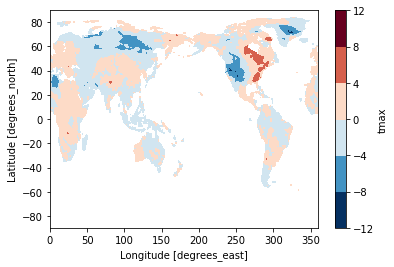

In [107]:
example.plot.contourf()


In [108]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from cartopy.feature import NaturalEarthFeature



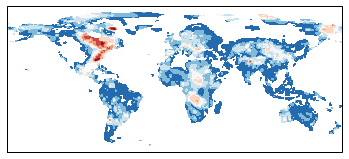

In [109]:

lons, lats = np.meshgrid(dl['lon'], dl['lat'])
#fig, ax = plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()})



fig, ax = plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()})

ax.contourf(lons, lats, example, levels=[-2, 0, 1, 2, 3, 4, 5, 6, 7], cmap='RdBu_r')

plt.savefig('AtlantaEvent1984.png')

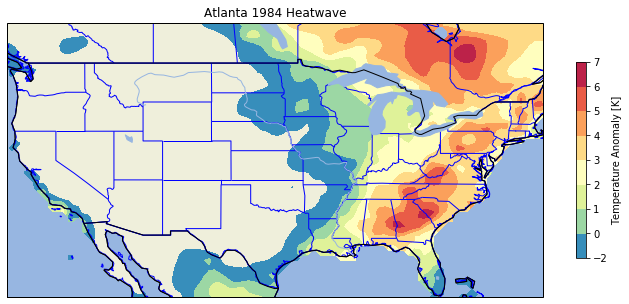

In [110]:
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shapereader


fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())

# colors:
#divnorm = mpl.colors.DivergingNorm(vmin=-2, vcenter=0, vmax=10)

img = ax.contourf(lons, lats, example, levels=[-2, 0, 1, 2, 3, 4, 5, 6, 7],cmap='Spectral_r')

ax.coastlines()

ax.set_extent((360-125, 360-70, 25, 50))


# Although it is a bit convoluted, here is one way to add state & national borders:

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
# Same for countries
countries = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='50m',
    facecolor='none')
# Now add those to the axes:
ax.add_feature(states_provinces, edgecolor='blue')
ax.add_feature(countries, edgecolor='blue')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)


ax.set_title("Atlanta 1984 Heatwave")

cb = fig.colorbar(img, shrink=0.6)
cb.set_label("Temperature Anomaly [K]")

plt.savefig('AtlantaEventUS1984.png')



In [ ]:
fig, ax = plt.subplots()
ax.bar( np.linspace(1, 21, 21), h[0])
ax.set_title("Paris")
ax.set_ylabel("Number of Events")
ax.set_xlabel("Event Duration [days]")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('Parisplot.png')



In [117]:
tmax = tmax_dataset['tmax'].sel(lat=48.86, lon=360-2.34, method='nearest')
print(f"The shape of this Tmax subset is {tmax.shape}. The minimum and maximum values in the subset are {tmax.max().values} and {tmax.min().values}.")

/project/amp/akwilson/testdata/ENTER/lib/python3.7/site-packages/dask/compatibility.py:93: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/project/amp/akwilson/testdata/ENTER/lib/python3.7/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


The shape of this Tmax subset is (14736,). The minimum and maximum values in the subset are 35.853904724121094 and -7.559085845947266.


In [119]:
events = zip(B['initial_index'][B['Event_ID'] != 0].values.astype(int), B['duration'][B['Event_ID'] != 0].values.astype(int))
event_data = dict()
# construct another dictionary at the same time to get the magnitude
magnitude = dict()
for i, event in enumerate(events):
    event_data[i] = tmax.isel(time=slice(event[0], event[0]+event[1])).values
    if event[1] > 7:
        magnitude[i] = event_data[i].max() - event_data[i].min()
        print(f"Multiday event at number {i} starts at time {event[0]}  which is {tmax['time'][event[0]].values} with duration {event[1]} days and magnitude {magnitude[i]}.")


KeyError: 'initial_index'

In [ ]:
myheatwave = dl['tmax'].sel(time=slice('2003-7-20', '2003-8-05'))

In [ ]:
x = myheatwave.mean(dim='time')

In [ ]:
x - avg.isel(dayofyear=slice(201,217)).mean(dim='dayofyear')

In [ ]:
example = x - avg.isel(dayofyear=slice(201,217)).mean(dim='dayofyear')

In [ ]:
example.plot.contourf()

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from cartopy.feature import NaturalEarthFeature



In [ ]:
lons, lats = np.meshgrid(dl['lon'], dl['lat'])
#fig, ax = plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()})



fig, ax = plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()})


ax.contourf(lons, lats, example, levels=[-4,-2, 0, 1, 2, 3, 4, 5, 6], cmap='RdBu_r')

plt.savefig('EuropeanHeatWave2003.png')

In [ ]:
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shapereader

In [ ]:
#fig = plt.figure(figsize=(12,6))
#ax = plt.axes(projection=ccrs.PlateCarree())

# colors:
#divnorm = mpl.colors.DivergingNorm(vmin=-2, vcenter=0, vmax=10)

fig = plt.figure(figsize=(2.61538461538, 3))
ax = plt.axes(projection=ccrs.EuroPP())
ax.coastlines(resolution='50m')
ax.gridlines()





In [ ]:

x_rolled = xr.assign_coords(lon=(np.where( 0 >= 180, -1* (0 % 180), lon_orig))).roll(lon=(len(x.lon) // 2))
img = ax.contourf(lons, lats, example,levels=[-4,-2, 0, 1, 2, 3, 4, 5, 6], cmap='Spectral_r')


ax.set_extent((360-285, 360-330, 15, 60))
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
# Same for countries
countries = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='50m',
    facecolor='none')

ax.add_feature(states_provinces, edgecolor='blue')
ax.add_feature(countries, edgecolor='blue')



In [182]:
[np.asscalar(i.values) for i in event_id_da.sel(lat=43.85, lon=2.35, method='nearest')]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0,
 0.0,
 5.0,
 5.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0